In [44]:
import pandas as pd
import numpy.linalg as la
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib notebook

In [45]:
pca = pd.read_csv('CelsoEdit.csv', encoding='latin1', sep=';')
pca[0:3]

,ID,D,M,A,S,X,Y
0,742163727,29,11,2017,53389,417,116
1,742163727,29,11,2017,53389,282,83
2,627658531,29,11,2017,53390,169,88


In [46]:
# convert matrix to float
pca = pca.astype('float64')

# drops the empty line at file-end
pca.dropna(how="all", inplace=True)

pca.tail()

,ID,D,M,A,S,X,Y
74236,480459745.0,7.0,12.0,2017.0,59890.0,28.0,641.0
74237,480459745.0,7.0,12.0,2017.0,59890.0,242.0,643.0
74238,480459745.0,7.0,12.0,2017.0,59890.0,464.0,650.0
74239,943942332.0,7.0,12.0,2017.0,59890.0,782.0,583.0
74240,943942332.0,7.0,12.0,2017.0,59890.0,1368.0,493.0


In [47]:
# split data table into data X and class labels y

X = pca.iloc[:,0:6].values
y = pca.iloc[:,6].values

In [48]:
# covariance matrix
cov_pca = np.cov(np.transpose(pca))

print('Covariance matrix \n%s' %cov_pca)

Covariance matrix 
[[ 8.37706999e+16 -2.99621568e+07  1.12405651e+06  0.00000000e+00
  -2.55401821e+10  8.11658322e+08  3.25124886e+08]
 [-2.99621568e+07  1.09242608e+02 -4.77029784e+00  0.00000000e+00
   1.01411357e+05 -1.41497602e+02 -4.13347350e+01]
 [ 1.12405651e+06 -4.77029784e+00  2.10409655e-01  0.00000000e+00
  -4.55392475e+03  6.50322802e+00  1.98987391e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.55401821e+10  1.01411357e+05 -4.55392475e+03  0.00000000e+00
   1.82439198e+08 -1.89265304e+05  1.59595092e+04]
 [ 8.11658322e+08 -1.41497602e+02  6.50322802e+00  0.00000000e+00
  -1.89265304e+05  1.08925295e+05  9.06426006e+02]
 [ 3.25124886e+08 -4.13347350e+01  1.98987391e+00  0.00000000e+00
   1.59595092e+04  9.06426006e+02  3.00807415e+04]]


In [49]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [50]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00001347 -0.0099046   0.00846672  0.         -0.00653318  0.00849706]
 [-0.0099046   1.00001347 -0.99499863  0.          0.71835205 -0.04101989]
 [ 0.00846672 -0.99499863  1.00001347  0.         -0.73502107  0.04295736]
 [ 0.          0.          0.          0.          0.          0.        ]
 [-0.00653318  0.71835205 -0.73502107  0.          1.00001347 -0.0424574 ]
 [ 0.00849706 -0.04101989  0.04295736  0.         -0.0424574   1.00001347]]


In [51]:
# eigenvectors and eigenvalues 

eig_vals, eig_vecs = la.eig(cov_pca)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.00000000e+00 -3.04891734e-07 -9.41809177e-09  3.79838554e-09
   1.78795617e-10 -2.21244391e-12  0.00000000e+00]
 [ 3.57668694e-10 -5.55837467e-04 -3.37372956e-04  1.65653307e-03
   9.99103321e-01 -4.23011409e-02  0.00000000e+00]
 [-1.34182538e-11  2.49605137e-05  1.65552210e-05 -7.87968355e-05
  -4.23010578e-02 -9.99104906e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 3.04882044e-07 -9.99999304e-01  1.03580795e-03  9.92310006e-05
  -5.56210991e-04 -1.42412885e-06  0.00000000e+00]
 [-9.68904788e-09  1.03672040e-03  9.99931015e-01  1.16956652e-02
   3.18929414e-04  2.16926471e-06  0.00000000e+00]
 [-3.88112892e-09 -8.80346697e-05  1.16952170e-02 -9.99930223e-01
   1.66217176e-03  8.67890148e-06  0.00000000e+00]]

Eigenvalues 
[8.37706999e+16 1.82431665e+08 1.08732243e+05 3.00673893e+04
 5.28685457e+01 1.91973060e-03 0.00000000e+00]


In [52]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
8.377069986697008e+16
182431665.3915822
108732.24338420377
30067.389267407085
52.86854570172403
0.0019197305999828858
0.0


In [53]:
# principal components
matrix_w = np.hstack((eig_pairs[2][1].reshape(7,1), 
                      eig_pairs[3][1].reshape(7,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-9.41809177e-09  3.79838554e-09]
 [-3.37372956e-04  1.65653307e-03]
 [ 1.65552210e-05 -7.87968355e-05]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.03580795e-03  9.92310006e-05]
 [ 9.99931015e-01  1.16956652e-02]
 [ 1.16952170e-02 -9.99930223e-01]]


In [54]:
Y = pca.dot(matrix_w)

In [55]:
Y[0:5]

,0,1
0,466.629261,-102.950773
1,331.252632,-71.531990
2,219.398360,-78.288087
3,175.436481,-81.802487
4,143.380212,-77.177097


<IPython.core.display.Javascript object>


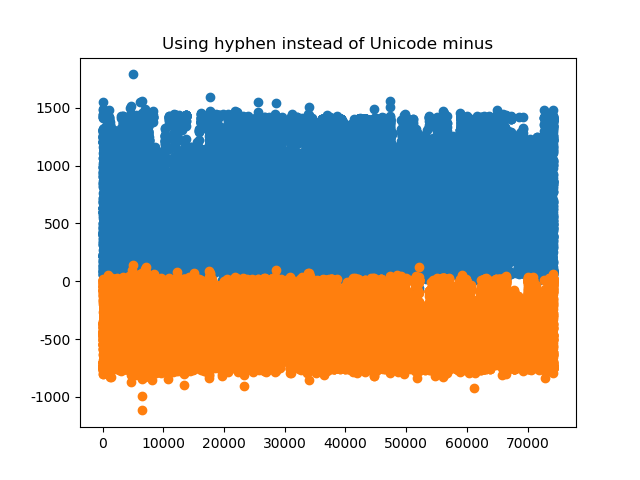

In [56]:
# Fixing random state for reproducibility
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.plot(Y, 'o')
ax.set_title('Using hyphen instead of Unicode minus')
plt.show()

In [57]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [58]:
# instantiate learning model
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print("Accuracy: " + str(round(accuracy_score(y_test, pred)*100, 2)) + "%")

Accuracy: 0.73%
